In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import os

In [8]:
dir_path = "C:/Users/joona/work_diractory/시각화용데이터_임베딩결과/"
f_list = os.listdir(dir_path)
print(f_list)
singer = pd.read_pickle(os.path.join(dir_path, f_list[2]))
song = pd.read_pickle(os.path.join(dir_path, f_list[3]))

['album_df_.pickle', 'clu_album_emb100.pickle', 'clu_singer_emb_100.pickle', 'clu_song_emb_200.pickle', 'clu_song_test.pickle', 'clu_tag_emb_30.pickle', 'clu_tag_gnr_title_emb_100.pickle', 'clu_tag_gnr_title_test.pickle']


In [9]:
song.head()

,song_id,label,vector1,vector2,vector3,vector4,vector5,vector6,vector7,vector8,...,vector91,vector92,vector93,vector94,vector95,vector96,vector97,vector98,vector99,vector100
0,144663,81,-3.148425,0.750318,3.072613,0.525002,-3.512241,-3.017920,-1.046888,0.735382,...,-3.428068,-4.138845,-1.233291,-4.006755,1.873970,2.310007,3.472715,1.293818,4.058638,-0.218241
1,116573,60,-1.873080,-2.444498,1.273128,0.017727,1.029912,0.517884,-5.193015,-0.845168,...,-0.558408,-4.053355,1.670949,-3.107049,0.876867,-0.889317,3.208157,0.833461,2.511628,0.709390
2,357367,119,-2.241840,-1.554076,1.312914,0.359657,-0.988056,-0.062449,-0.063281,4.080726,...,0.204263,-1.627694,0.021887,-0.404910,-0.440495,-3.360089,2.566588,2.132551,2.838747,1.375059
3,366786,199,-2.515584,-1.300756,0.755813,-1.012893,-3.565576,-0.364969,-2.768528,-0.108413,...,-0.432053,-3.454705,3.130727,-2.727538,2.347215,-0.121203,4.718843,1.826789,2.781937,-1.202482
4,133143,158,-0.187791,3.788712,-2.405741,-3.098448,-1.652190,-3.954020,-2.370774,-5.517591,...,0.191713,-3.223214,3.268676,-1.586885,3.349843,3.537786,7.769712,1.660735,-0.974760,2.236546


In [10]:
song.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649091 entries, 0 to 649090
Columns: 102 entries, song_id to vector100
dtypes: float32(100), int32(1), object(1)
memory usage: 255.0+ MB


In [11]:
singer.head()

,tv_complex,label,vector1,vector2,vector3,vector4,vector5,vector6,vector7,vector8,...,vector91,vector92,vector93,vector94,vector95,vector96,vector97,vector98,vector99,vector100
0,아이유,30,3.668431,-4.596569,-1.733261,2.043928,-0.449943,-0.243723,3.795067,4.188351,...,7.532903,-1.575805,1.527108,-0.881034,-2.208171,2.565416,3.119889,1.895376,4.288498,-5.068440
1,노래,47,1.634305,11.777004,-4.324384,2.814630,4.283519,-1.493059,3.193636,-3.706301,...,5.145742,-6.793909,-5.710216,2.889868,-2.675868,2.913104,-7.255038,-4.260543,10.082064,3.517689
2,성시경,74,4.029515,1.700792,-5.997426,-0.834686,-3.422123,9.090942,0.517240,-3.868313,...,-4.536369,1.359088,1.816285,-1.501272,0.209240,4.143530,-7.839284,-3.818662,7.535976,-11.862991
3,어반자카파,34,4.429124,-7.029132,-3.830669,6.872304,-1.517246,7.082065,-1.265338,-2.064539,...,2.826073,-10.906363,-2.118165,-2.025344,4.822627,2.880719,0.991429,-1.633109,-14.721144,-3.448065
4,음악,47,-1.643516,9.747047,-8.044359,1.186139,4.028796,-1.439287,0.598954,-4.268470,...,7.764330,-4.264215,-4.156377,3.536204,-1.153171,-0.601141,-6.153019,-4.588677,7.276544,5.868493


In [12]:
singer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123771 entries, 0 to 123770
Columns: 102 entries, tv_complex to vector100
dtypes: float32(100), int32(1), object(1)
memory usage: 48.6+ MB


In [89]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
tsne = TSNE(n_components=3)
sc = StandardScaler()

def pca_df( data ):
    df = data.copy()
    values = df[df.columns[2:]].values
    pca_data = pd.DataFrame(pca.fit_transform(sc.fit_transform(values)),columns = [f"vec{i}" for i in range(1,4)])
    df = pd.concat( [df[df.columns[:2]], pca_data], 1)
    return df


def tsne_df( data ):
    df = data.copy()
    values = df[df.columns[2:]].values
    pca_data = pd.DataFrame(tsne.fit_transform(sc.fit_transform(values)),columns = [f"vec{i}" for i in range(1,4)])
    df = pd.concat( [df[df.columns[:2]], pca_data], 1)
    return df

In [ ]:
sam_sc_tsne_song = tsne_df(song.sample(frac=0.3))
sam_sc_tsne_singer = tsne_df(singer.sample(frac=0.3))
sam_sc_tsne_song.to_pickle('tsne_song_sample.pickle')
sam_sc_tsne_singer.to_pickle('tsne_singer_sample.pickle')

In [26]:
singer_tsne = pd.read_pickle('singer_tsne.pickle')
song_tsne = pd.read_pickle('song_tsne.pickle')

No handles with labels found to put in legend.


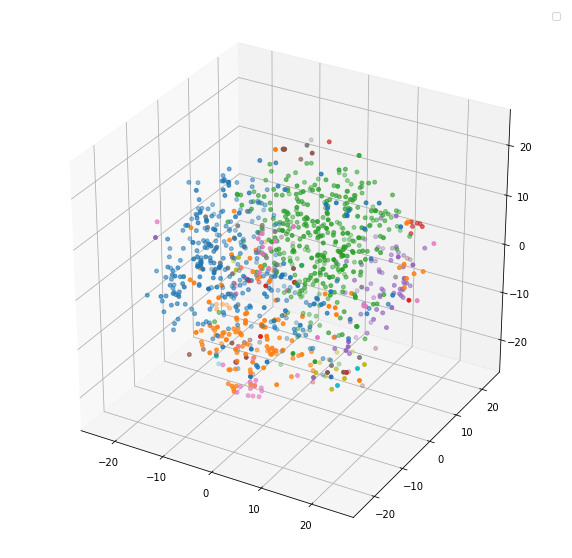

In [56]:
sample_df = singer_tsne.sample(n = 1000)
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
for l in sample_df.label.unique():
    sample = sample_df.loc[sample_df.label == l]
    ax.scatter(sample.vec1, sample.vec2, sample.vec3, marker='o', s=15 )

In [78]:
song_pca = pca_df(song)
singer_pca = pca_df(singer)
print( song_pca.shape, singer_pca.shape )

(649091, 5) (123771, 5)


In [84]:
song_pca.to_pickle('song_pca.pickle')
singer_pca.to_pickle('singer_pca.pickle')

In [ ]:
# sam_sc_tsne_song
sample_df = sam_sc_tsne_song.sample(n = 50000)
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
for l in sample_df.label.unique():
    sample = sample_df.loc[sample_df.label == l]
    ax.scatter(sample.vec1, sample.vec2, sample.vec3, marker='o', s=15 )
plt.legend()

In [ ]:
fig  = plt.figure( figsize = (10,10) )
for l in sample_df.label.unique():0
    sample = sample_df.loc[sample_df.label == l]
    sns.scatterplot(sample.vec1, sample.vec2)